In [1]:
from matplotlib import pyplot as plt

In [2]:
import numpy as np

In [3]:
# flower dimentions length , width , type (0,1)

data = [[3,    1.5, 1],
        [2,    1,   0],
        [4,    1.5, 1],
        [3,    1,   0],
        [3.5, .5,   1],
        [2,   .5,   0],
        [5.5,  1,   1],
        [1,    1,   0]]
unknownFlower = [4.5, 1]

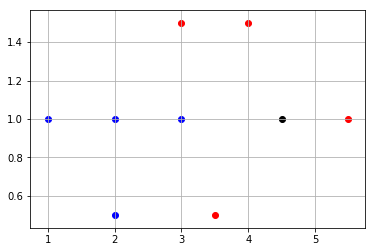

In [4]:
# plotting the flowers using scatter plotting
def vis_data():
    
    plt.grid()
    
    for i in range(len(data)):
        c = 'r'
        if data[i][2] == 0:
            c = 'b'
        plt.scatter(data[i][0],data[i][1],c=c)
    plt.scatter(unknownFlower[0],unknownFlower[1],c ='0')
vis_data()

In [5]:
# activation function 
def sigmoid(x):
    return (1/(1+np.exp(-x)))

def sigmoid_dash(x):
    return sigmoid(x)*(1 - sigmoid(x))

def tanH(x):
    return np.tanh(x)

def tanH_dash(x):
    #np.square(np.sech(x))
    return 1-np.square(np.tanh(x))

In [6]:
for i in range(10):
    print("{} -->{}".format(i,sigmoid(i)))

0 -->0.5
1 -->0.7310585786300049
2 -->0.8807970779778823
3 -->0.9525741268224334
4 -->0.9820137900379085
5 -->0.9933071490757153
6 -->0.9975273768433653
7 -->0.9990889488055994
8 -->0.9996646498695336
9 -->0.9998766054240137


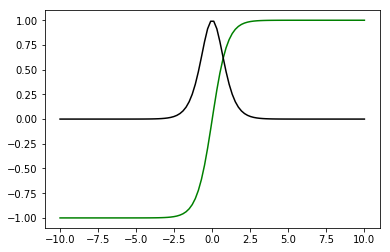

In [7]:
X = np.linspace(-10,10,100)
X2 = [0,0,0,0,0,0,0,0,0]
Y = [-1, -.75, -.5, -.25, 0, .25, .5, .75, 1]
#plt.plot(X,sigmoid(X),c = 'b')
#plt.plot(X,sigmoid_dash(X),c = 'r')
plt.plot(X,tanH(X),c = 'g')
plt.plot(X,tanH_dash(X),c = '0')
#plt.Line2D([X2],[Y],c='y')

In [8]:
#training dataset to nn
def train_data():
    #random weight in the begining and bringing them to get minimum cost
    w1 = np.random.randn()
    w2 = np.random.randn()
    b = np.random.randn()
    print("{},{},{}".format(w1,w2,b))
    
    iterations = 10000
    learning_rate = 0.1
    
    costs = []
    
    for i in range(iterations):
        
        #get some random data point and feed into the network
        ri = np.random.randint(len(data))
        point = data[ri]
        
        z = w1 * point[0] + w2 * point[1] + b
        pred = sigmoid(z)
        target = point[2]
        
        #  cost squared function
        cost = np.square(pred - target)
        
        # print the cost for every 100 iterations
        if i % 100 == 0:
            
            c = 0
            for j in range(len(data)):
                p = data[j]
                p_pred = sigmoid(w1* p[0]+ w2* p[1]+b)
                c+= np.square(p_pred - p[2])
                
            costs.append(c)
            
        dcost_dpred = 2 * (pred - target)
        dpred_dz = sigmoid_dash(z)
        
        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_db = 1
        
        dcost_dz = dcost_dpred * dpred_dz
        
        dcost_dw1 = dcost_dz * dz_dw1
        dcost_dw2 = dcost_dz * dz_dw2
        dcost_db = dcost_dz * dz_db
        #print("{},{},{}".format(dcost_dw1,dcost_dw2,dcost_db))
        
        # updating the parameters to get the nearest expected values
        w1 = w1 - learning_rate * dcost_dw1
        w2 = w2 - learning_rate * dcost_dw2
        b = b - learning_rate * dcost_db
    
        
    return costs , w1,w2,b
  

In [9]:
costs , w1 , w2 , b = train_data()
print("{},{},{}".format(w1,w2,b))

-1.330981178453732,1.1111329862365973,-0.4616816621998596
2.5629162000917534,0.8964733350001921,-8.448631043249845


In [14]:
costs

[3.1255012332286425,
 2.628523532934974,
 2.106296608866419,
 1.5239132543831253,
 1.2295710276569394,
 1.1395851461846387,
 1.0431533729665396,
 0.9794391720402084,
 0.9355268120406405,
 0.9338614376591089,
 1.0133928208582812,
 0.8374046652823586,
 0.83392557073738,
 0.8201804138513762,
 0.7867072892268868,
 0.7880613336360504,
 0.7760328456683911,
 0.7436904012881248,
 0.7602637094226284,
 0.7120526589080838,
 0.6996689170523872,
 0.7042839619471057,
 0.7965804263335238,
 0.7187187565415152,
 0.6725787682444394,
 0.6624114090954707,
 0.7032522314994242,
 0.6745595493298179,
 0.6557003521892559,
 0.6589734180383203,
 0.67334706320128,
 0.6334609861378157,
 0.6231009381995611,
 0.7491752579429461,
 0.6385754808270443,
 0.6147479465378185,
 0.6226651133893181,
 0.6210376662671353,
 0.5984959821781659,
 0.5959546886676226,
 0.6179275346955758,
 0.6137120266063557,
 0.5882445677971954,
 0.6387302303665882,
 0.5945457485921566,
 0.617663015612325,
 0.6339367170077067,
 0.5884882881977358,

In [10]:
w1

2.5629162000917534

In [11]:
w2

0.8964733350001921

In [12]:
b

-8.448631043249845

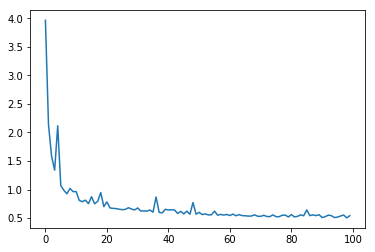

In [13]:
plt.plot(costs)

In [14]:
# predicting the unknown flower
z = w1 * unknownFlower[0] + w2 * unknownFlower[1] + b
pred = sigmoid(z)
print(pred)



0.9816744808892174


In [15]:
import os
def predict(m1,m2):
    z = w1 * m1 + w2 * m2 + b
    pred = sigmoid(z)
    if pred >.5:
        os.system("say 'Its Red Flower'")
        print("Its Red Flower")
    else:
        os.system("say 'Its Blue Flower'")
        print("Its Blue Flower")
    

In [16]:
predict(2,1)

Its Blue Flower


In [25]:
# to plot the predictions with x and y as lengths and weights
def plot_rand_predictions():
    for X in np.linspace(0, 6, 50):
        for Y in np.linspace(0, 3, 50):
            pred = sigmoid(w1 * X + w2 * Y +b)
            c = 'b'
            if pred >.5:
                c = 'r'
            plt.scatter(X,Y,c=c,alpha=.5)
            

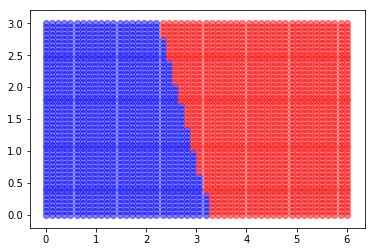

In [26]:
plot_rand_predictions()